# Combinatorics with Uproot and Awkward Arrays

In this presentation, I'll show an Uproot-Awkward Array-Vector-Hist analysis in **basic mode** and **advanced mode** (with combinatorics).

I'll leave a lot of time open for questions, since that is the advantage of a live session over a pre-recorded tutorial.

If you'd like to see similar tutorials in deeper levels of detail, go to

| <!-- --> | <!-- --> | <!-- --> | <!-- --> | <!-- --> |
|:--|:--|:--|:--|:--|
| 2020 | EIC collaboration tutorial | | [notebooks](https://github.com/jpivarski-talks/2020-04-08-eic-jlab#readme) | [video](https://www.youtube.com/watch?v=FoxNS6nlbD0) |
| 2020 | CMS HATS tutorial | | [notebooks](https://github.com/jpivarski/2020-06-08-uproot-awkward-columnar-hats#readme) | |
| 2020 | SciPy talk | non-HEP | [notebooks](https://github.com/jpivarski-talks/2020-07-06-scipy2020/blob/master/bikeroutes-execution.ipynb) | [video](https://youtu.be/WlnUF3LRBj4) |
| 2020 | PyHEP tutorial | | [notebooks](https://github.com/jpivarski/2020-07-13-pyhep2020-tutorial#readme) | [video](https://youtu.be/ea-zYLQBS4U) |
| 2021 | CMS HATS tutorial | | [notebooks](https://github.com/jpivarski-talks/2021-06-14-uproot-awkward-columnar-hats#readme) | |
| 2021 | PyHEP tutorial | | [notebooks](https://github.com/jpivarski-talks/2021-07-06-pyhep-uproot-awkward-tutorial#readme) | [video](https://youtu.be/s47Nz0h0vcg) |
| 2021 | STAR collaboration tutorial | | [notebooks](https://github.com/jpivarski-talks/2021-09-13-star-uproot-awkward-tutorial#readme) | |
| 2022 | PyHEP topical meeting | | [notebooks](https://indico.cern.ch/event/1140031/) | |
| 2022 | SciPy tutorial | non-HEP | [notebooks](https://github.com/jpivarski-talks/2022-07-11-scipy-loopy-tutorial#readme) | [video](https://youtu.be/Dovyd72eD70) |
| 2022 | CoDaS-HEP tutorial | | [notebooks](https://github.com/jpivarski-talks/2022-08-03-codas-hep-columnar-tutorial#readme) | |

This presentation will also use Uproot version 5 and Awkward version 2, which will be fully released in December. For now,

```bash
pip install --pre uproot awkward
```

and

In [1]:
import uproot

In [2]:
import awkward._v2 as ak

<br><br><br><br><br>

## Overview

Just as in the broader Python world, functionality in Scikit-HEP is provided by small, specialized, interoperating libraries that build on each other.

<table width="1000px"><tr style="background: white">
    <td align="center" width="50%" style="font-size: 24px; font-weight: bold">Scientific Python ecosystem</td>
    <td align="center" width="50%" style="font-size: 24px; font-weight: bold">Scikit-HEP ecosystem</td>
</tr><tr style="background: white">
    <td align="center" width="50%"><img src="img/shells-border.png" width="95%"></td>
    <td align="center" width="50%"><img src="img/shells-hep.svg" width="95%"></td>
</tr></table>

<br><br><br><br><br>

## Libraries used in this talk

<br><br>

<img src="img/uproot-logo.png" width="200px">

<p style="font-size: 14pt">Reads ROOT data as <span style="background: yellow">arrays</span>.</p>

<br><br>

<img src="img/awkward-logo.png" width="200px">

<p style="font-size: 14pt">Manipulates <span style="background: yellow">arrays</span> of arbitrary data structures.</p>

<br><br>

<img src="img/vector-logo.png" width="200px">

<p style="font-size: 14pt">Transforms <span style="background: yellow">arrays</span> of 2D, 3D, and Lorentz vectors.</p>

<br><br>

<img src="img/hist-logo.png" width="200px">

<p style="font-size: 14pt">Fills histograms from <span style="background: yellow">arrays</span> of data.</p>

<br><br>

<b>Using them effectively will require thinking about whole arrays at a time.</b>

<br><br><br>

## Array-at-a-time thinking and interactivity

There's a long history of _array-oriented_ languages, which take arrays as the fundamental data type.

<img src="img/apl-timeline.svg" width="800">

<br><br><br>

Interestingly enough, they all (except Fortran 90 and Dex) are _interactive_, command-line or notebook-driven languages.

<br>

It's because they focus on problems in which we want to know what happens to whole distributions, not individual values.

<br>

For example,

In [6]:
import numpy as np
import matplotlib.pyplot as plt

<br><br>

Suppose we start with a Gaussian-distributed dataset.

In [8]:
dataset = np.random.normal(0, 1, 1000000)  # one MILLION data points

<br><br>

"How are they distributed?"

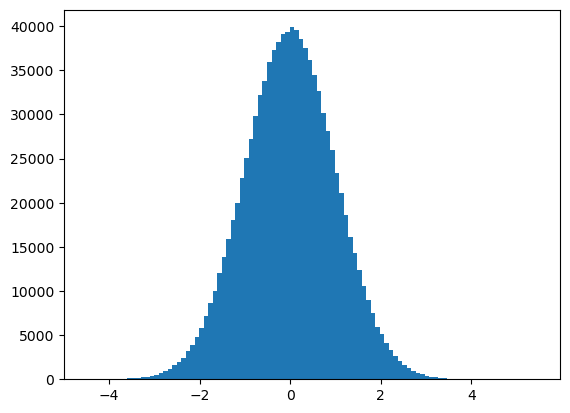

In [9]:
plt.hist(dataset, bins=100);

<br><br>

"How is the square of each point distributed?"

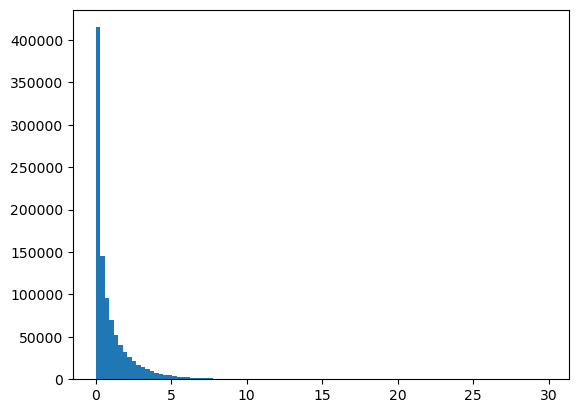

In [10]:
plt.hist(dataset**2, bins=100);

<br><br>

"What about this weirdo function?"

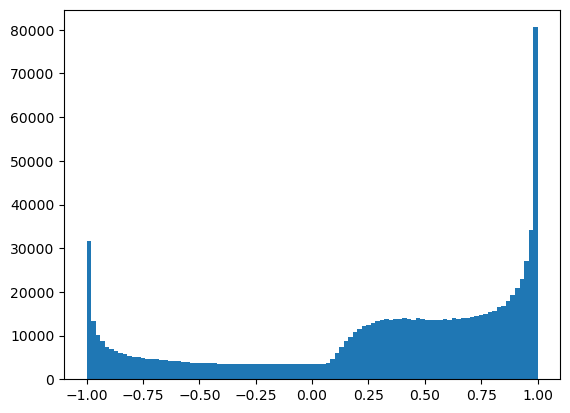

In [11]:
plt.hist(np.sin(1/dataset**2), bins=100);

<br><br>

The last one would have been hard to guess, and as long as we're in "compute operation, plot, compute operation, plot" mode, setting up `for` loops would be an imposition.

<br><br>

Array-oriented computations and interactivity go together. If you don't like Jupyter, consider IPython, the prompt, or IDE features that let you interact with data. Don't just run a script unless you've already set up your analysis!

<br><br><br><br><br>

## Basic Uproot analysis